In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import io
import seaborn as sns
import numpy as np

In [95]:
# Estimation of Positive Predictive Value and Negative Predictive Value
# using Apple Watch using Data from Apple and The Rotterdam AF Study.

#import af prevalence
# adapted from https://doi.org/10.1093/eurheartj/ehi825
af = pd.read_csv("af.csv")

# add in average age of age ranges and prevalence columns
af["prev"] = af.cases / af.num
af["ageav"] = (af.agemax + 1 + af.agemin)/2

# Performance Characteristics as by https://www.apple.com/healthcare/site/docs/Apple_Watch_Arrhythmia_Detection.pdf
# 98.3% sensitivity and 99.6% specificity
sens = 0.983
spec = 0.996

af["ppv"] = (sens * af.prev) / ((sens * af.prev) + ((1-spec)*(1 - af.prev)))
af["npv"] = (spec * (1-af.prev)) / (((1 - sens) * af.prev) + (spec*(1 - af.prev)))
print(af)

   agemin  agemax   num  cases      prev  ageav       ppv       npv
0      55      59  1161      8  0.006891   57.5  0.630330  0.999882
1      60      64  1411     24  0.017009   62.5  0.809609  0.999705
2      65      69  1291     51  0.039504   67.5  0.909970  0.999298
3      70      74  1130     68  0.060177   72.5  0.940246  0.998908
4      75      79   855     77  0.090058   77.5  0.960509  0.998314
5      80      84   533     72  0.135084   82.5  0.974608  0.997341
6      85     100   427     76  0.177986   93.0  0.981554  0.996318


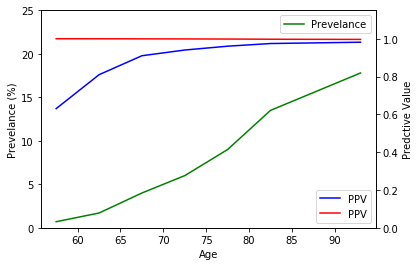

In [105]:
#create prevalence percentages for graph
af["prevpercent"] = np.round(af.prev*100, 1)
pr = sns.lineplot(x="ageav", y="prevpercent", data=af, color="g", label="Prevelance")
pr.set_xlabel("Age")
pr.set_ylabel("Prevelance (%)")
pr.set_ylim(bottom=0, top=25)

ax2 = plt.twinx()
ax2.set_ylim(bottom=0, top=1.15)
ppv = sns.lineplot(x="ageav", y="ppv", data=af, color="b", ax=ax2, label="PPV")
npv = sns.lineplot(x="ageav", y="npv", data=af, color="r", ax=ax2, label="PPV")
ax2.set_ylabel("Predctive Value")
plt.legend(loc=4)

plt.show()